In [19]:
# Learned how to use json to get the current citibke status
import requests
import json
import pandas as pd

# Public json url from Citibike
stations_url = 'https://feeds.citibikenyc.com/stations/stations.json'

# Request the response and parse the json
data = requests.get(stations_url).json()

In [20]:
# Show a sample of the json dicts
# The Citibike Station json returns a list of dicts
data['stationBeanList'][0]

{'id': 301,
 'stationName': 'E 2 St & Avenue B',
 'availableDocks': 19,
 'totalDocks': 58,
 'latitude': 40.72217444,
 'longitude': -73.98368779,
 'statusValue': 'In Service',
 'statusKey': 1,
 'availableBikes': 38,
 'stAddress1': 'E 2 St & Avenue B',
 'stAddress2': '',
 'city': '',
 'postalCode': '',
 'location': '',
 'altitude': '',
 'testStation': False,
 'lastCommunicationTime': '2019-08-05 09:57:06 PM',
 'landMark': ''}

In [21]:
# Process the list of dictionary into DataFrame
station_df = pd.DataFrame(data['stationBeanList'])

In [22]:
# Show the list of columns in the DataFrame
station_df.columns

Index(['altitude', 'availableBikes', 'availableDocks', 'city', 'id',
       'landMark', 'lastCommunicationTime', 'latitude', 'location',
       'longitude', 'postalCode', 'stAddress1', 'stAddress2', 'stationName',
       'statusKey', 'statusValue', 'testStation', 'totalDocks'],
      dtype='object')

In [23]:
# Preview the DataFrame
station_df.head(5)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,38,19,,301,,2019-08-05 09:57:06 PM,40.722174,,-73.983688,,E 2 St & Avenue B,,E 2 St & Avenue B,1,In Service,False,58
1,,3,25,,307,,2019-08-05 09:55:45 PM,40.714275,,-73.989900,,Canal St & Rutgers St,,Canal St & Rutgers St,1,In Service,False,30
2,,5,22,,312,,2019-08-05 09:57:18 PM,40.722055,,-73.989111,,Allen St & Stanton St,,Allen St & Stanton St,1,In Service,False,31
3,,9,38,,358,,2019-08-05 09:54:19 PM,40.732916,,-74.007114,,Christopher St & Greenwich St,,Christopher St & Greenwich St,1,In Service,False,50
4,,7,19,,432,,2019-08-05 09:57:17 PM,40.726218,,-73.983799,,E 7 St & Avenue A,,E 7 St & Avenue A,1,In Service,False,31


In [24]:
station = station_df.copy()
station_df = station_df[['id', 
                         'stationName',
                         'availableBikes', 
                         'availableDocks', 
                         'totalDocks',
                         'statusValue']]

In [25]:
station_df.sort_values(by='availableBikes', 
                             ascending=False)
station_df.head(10)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
0,301,E 2 St & Avenue B,38,19,58,In Service
1,307,Canal St & Rutgers St,3,25,30,In Service
2,312,Allen St & Stanton St,5,22,31,In Service
3,358,Christopher St & Greenwich St,9,38,50,In Service
4,432,E 7 St & Avenue A,7,19,31,In Service
5,438,St Marks Pl & 1 Ave,2,43,47,In Service
6,487,E 20 St & FDR Drive,15,19,34,In Service
7,504,1 Ave & E 16 St,17,36,53,In Service
8,532,S 5 Pl & S 5 St,16,25,43,In Service
9,3092,Berry St & N 8 St,7,20,27,In Service


In [26]:
# Create a boolean array mask where there are no bikes
# Make sure the station is in service right now.
in_service_mask = (station_df['statusValue'] == 'In Service')

# Active station only
active_station = station_df[in_service_mask]

# Find out which station has no bike avaliable
zero_bike_mask = (active_station['availableBikes'] == 0)

# Apply the zero_bike_mask
zero_bike = active_station[zero_bike_mask]

# Sample the output
zero_bike.sample(5)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
406,3195,Sip Ave,0,34,34,In Service
447,3273,Manila & 1st,0,17,18,In Service
843,3799,6 Ave & W 34 St,0,31,31,In Service
209,469,Broadway & W 53 St,0,56,57,In Service
110,335,Washington Pl & Broadway,0,26,27,In Service


# Question: How many stations are without bike?

In [27]:
# Get the count of stations without bikes
num_of_stations_without_bike = zero_bike['id'].count()
print('There are {0:,} stations without bike!'.format(
    num_of_stations_without_bike))

There are 107 stations without bike!


In [28]:
# Find out which station has no dock avaliable
zero_dock_mask = (active_station['availableDocks'] == 0)

# Apply the zero_dock_mask
zero_dock = active_station[zero_dock_mask]

zero_dock.sample(5)

,id,stationName,availableBikes,availableDocks,totalDocks,statusValue
479,3308,Kane St & Clinton St,26,0,27,In Service
635,3511,Adam Clayton Powell Blvd & W 115 St,21,0,22,In Service
639,3515,24 Ave & 26 St,19,0,19,In Service
585,3424,E 106 St & Lexington Ave,27,0,27,In Service
712,3591,21 St & 31 Dr,21,0,21,In Service


# Question: How many stations are without a dock?

In [29]:
num_of_stations_without_dock = zero_dock['id'].count()
print('There are {0:,} stations without dock!'.format(
    num_of_stations_without_dock))

There are 75 stations without dock!


In [30]:
no_dock = num_of_stations_without_dock
no_bike = num_of_stations_without_bike
total = active_station.shape[0] - no_dock - no_bike

In [31]:
arr = pd.Series([no_dock, no_bike, total],
                dtype='int64',
                index=['No Dock', 'No Bike', 'Active (Has Both)'])

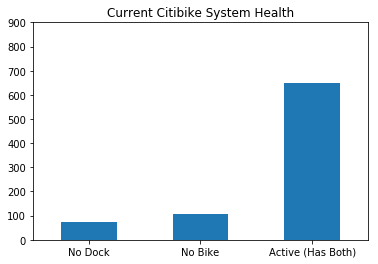

In [32]:
arr.plot(kind='bar', rot=0,
         ylim=(0, 900),
         title='Current Citibike System Health')

In [33]:
# Motivated to plot these station onto a map!

In [35]:
station.head(5)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,38,19,,301,,2019-08-05 09:57:06 PM,40.722174,,-73.983688,,E 2 St & Avenue B,,E 2 St & Avenue B,1,In Service,False,58
1,,3,25,,307,,2019-08-05 09:55:45 PM,40.714275,,-73.989900,,Canal St & Rutgers St,,Canal St & Rutgers St,1,In Service,False,30
2,,5,22,,312,,2019-08-05 09:57:18 PM,40.722055,,-73.989111,,Allen St & Stanton St,,Allen St & Stanton St,1,In Service,False,31
3,,9,38,,358,,2019-08-05 09:54:19 PM,40.732916,,-74.007114,,Christopher St & Greenwich St,,Christopher St & Greenwich St,1,In Service,False,50
4,,7,19,,432,,2019-08-05 09:57:17 PM,40.726218,,-73.983799,,E 7 St & Avenue A,,E 7 St & Avenue A,1,In Service,False,31


In [43]:
import plotly.express as px

px.set_mapbox_access_token(open('token.txt').read())
fig = px.scatter_mapbox(station,
                        lat='latitude',
                        lon='longitude',
                        color='availableBikes',
                        size='availableBikes',
                        color_continuous_scale='Magma',
                        size_max=10,
                        zoom=11)
fig.show()

In [39]:
px.colors

<module 'plotly.express.colors' from '/Users/Study/anaconda3/lib/python3.7/site-packages/plotly/express/colors.py'>